
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Visualizing Spatial Continuity in Python for Engineers, Data Scientists and Geoscientists 
### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

This a simple demonstration of the calculate of 1D datasets with variable spatial continuity and visualization.

* it is useful to tune our eyes to recognized the difference between spatial continuous and completely random spatial phenomenon 

* we will perform the calculations in 1D for fast run times and ease of visualization.

#### Load the required libraries

The following code loads the required libraries.


In [24]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
plt.rc('axes', axisbelow=True)                              # set axes and grids in the background for all plots
import math                                                 # for square root
from geostatspy import GSLIB 
seed = 73073

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [25]:
#os.chdir("C:\PGE337")                                      # set the working directory

#### Generate the Initial Random Dataset

We will asume random and Gaussian distributed.

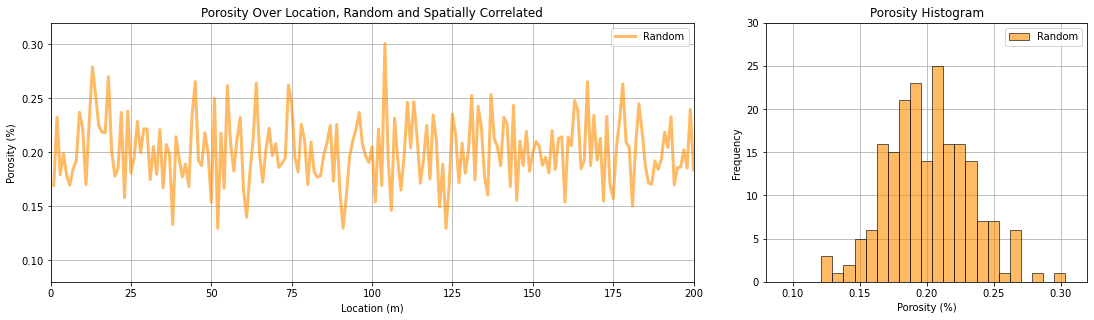

In [89]:
n = 200; mean = 0.20; stdev = 0.03

np.random.seed(seed = seed)
data0 = np.random.normal(loc=0.20,scale=0.03,size=n+1000)
data0 = GSLIB.affine(data0,mean,stdev)

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1]})

plt.subplot(121)
plt.plot(np.arange(1,n+1),data0[500:n+500],color='darkorange',lw=3,alpha=0.6,label='Random')
plt.xlim([0,n]); plt.ylim([mean-4*stdev,mean+4*stdev])
plt.xlabel('Location (m)'); plt.ylabel('Porosity (%)'); plt.title('Porosity Over Location, Random and Spatially Correlated')
plt.grid(); plt.legend(loc='upper right')

plt.subplot(122)
plt.hist(data0[500:n+500],color='darkorange',alpha=0.6,edgecolor='black',bins=np.linspace(mean-4*stdev,mean+4*stdev,30),label='Random')
plt.xlim([mean-4*stdev,mean+4*stdev]); plt.ylim([0,30])
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.grid(); plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.9, wspace=0.15, hspace=0.0); plt.show()

Take some time to observe a random phenomenon. 

* see any patterns, e.g., strings of low or high values, increasing or decreasing trends?

#### Add Spatial Correlation

We can use convolution to add spatial continuity to a random set of values

* we won't go into the details, but the convolution kernel can actually be related to the variogram in sequential Gaussian simulation.

* we apply an affine correction to ensure that we don't change the mean or standard deviation with the convolution, we just change the spatial continuity

* since we are using convolution, it is likely that there will be edge artifacts, so we have 'cut off' the edges of the model (500 m on each side).

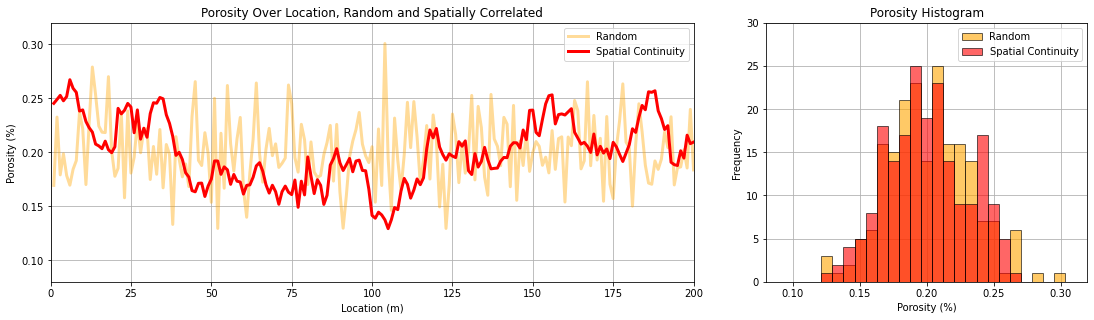

In [94]:
size1 = 50
kern1 = np.ones(size1)
data1 = np.convolve(data0,kern1,mode='same')
data1_sub = GSLIB.affine(data1[500:n+500],mean,stdev)

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1]})

plt.subplot(121)
plt.plot(np.arange(1,n+1),data0[500:n+500],color='orange',lw=3,alpha=0.4,label='Random')
plt.plot(np.arange(1,n+1),data1_sub,color='red',lw=3,label='Spatial Continuity')
plt.xlim([0,n]); plt.ylim([mean-4*stdev,mean+4*stdev])
plt.xlabel('Location (m)'); plt.ylabel('Porosity (%)'); plt.title('Porosity Over Location, Random and Spatially Correlated')
plt.grid(); plt.legend(loc='upper right')

plt.subplot(122)
plt.hist(data0[500:n+500],color='orange',alpha=0.6,edgecolor='black',bins=np.linspace(mean-4*stdev,mean+4*stdev,30),label='Random')
plt.hist(data1_sub,color='red',alpha=0.6,edgecolor='black',bins=np.linspace(mean-4*stdev,mean+4*stdev,30),label='Spatial Continuity')
plt.xlim([mean-4*stdev,mean+4*stdev]); plt.ylim([0,30])
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.grid(); plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.9, wspace=0.15, hspace=0.0); plt.show()

#### Comments

This was a basic demonstration of fundamental workflow building blocks for machine learning in Python with scikit-learn. 

I have many other demonstrations on simulation to build spatial models with spatial continuity and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
